In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary.csv', index_col = 0)
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


Populating the interactive namespace from numpy and matplotlib


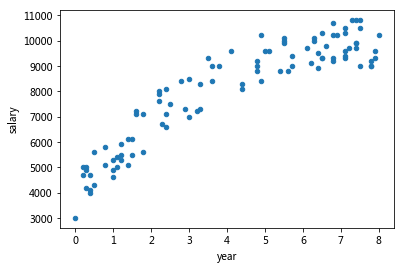

In [2]:
%pylab inline
df.plot(kind = 'scatter',x = 'year', y= 'salary')

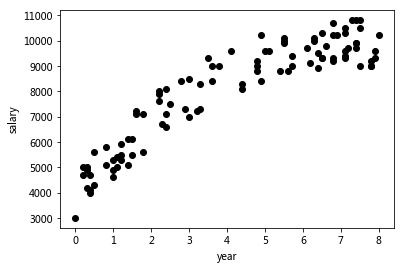

In [3]:
from matplotlib import pyplot as plt
X = df[['year']]
Y = df['salary'].values
plt.scatter(X, Y, color='black')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()

## 簡單線性迴歸

In [4]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
print('Intercept',regr.intercept_)
print('coefficient', regr.coef_)

Intercept 5049.00989981
coefficient [ 712.59413615]


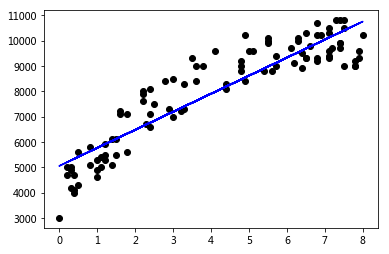

In [11]:
X = df[['year']]
Y = df['salary'].values
plt.scatter(X, Y, color='black')
plt.plot(X, regr.predict(X), color="blue")
plt.show()

In [13]:
salaries = pandas.DataFrame([{'year': 6}, {'year': 8}])
print(regr.predict(salaries))

#Intercept 5049.00989981
#coefficient [ 712.59413615]
712.59413615 * 6 + 5049.00989981

[  9324.57471669  10749.76298898]


9324.574716710002

In [15]:
from sklearn.externals import joblib
joblib.dump(regr, 'regression.pkl') 

['regression.pkl']

In [16]:
clf = joblib.load('regression.pkl') 

In [17]:
salaries = pandas.DataFrame([{'year': 6}, {'year': 8}])
print(clf.predict(salaries))

[  9324.57471669  10749.76298898]


## 多項式線性迴歸

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 2)
X_ = poly_reg.fit_transform(X)

regr = LinearRegression()
regr.fit(X_,Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

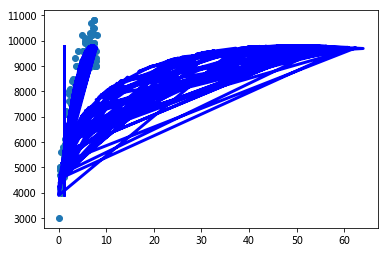

In [26]:
plt.scatter(X,Y)
plt.plot(X_, regr.predict(X_), color = 'blue', linewidth = 3)
plt.show()

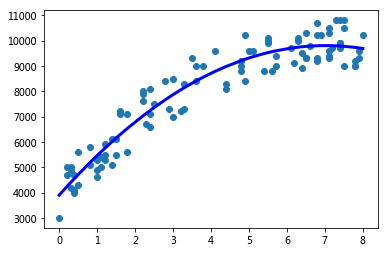

In [30]:
X2  = X.sort_values('year')
X2_ = poly_reg.fit_transform(X2)

plt.scatter(X,Y)
plt.plot(X2, regr.predict(X2_), color = 'blue', linewidth = 3)
plt.show()

## 多元迴歸模型

In [31]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/house-prices.csv')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [37]:
dummy_brick    = pandas.get_dummies(df['Brick'])
dummy_neighbor = pandas.get_dummies(df['Neighborhood'])

house = pandas.concat([df, dummy_brick, dummy_neighbor], axis = 1)

In [39]:
del house['No']
del house['West']
del house['Brick']
del house['Neighborhood']
del house['Home']

In [40]:
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Yes,East,North
0,114300,1790,2,2,2,0,1,0
1,114200,2030,4,2,3,0,1,0
2,114800,1740,3,2,1,0,1,0
3,94700,1980,3,2,3,0,1,0
4,119800,2130,3,3,3,0,1,0


In [43]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

X = house[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East','North']]
Y = house['Price'].values

regr.fit(X,Y)
#regr.predict(X)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 評估迴歸模型

In [44]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sat, 02 Sep 2017   Prob (F-statistic):           8.25e-50
Time:                        13:38:59   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2.284e+04   1.02e+04      2.231      0.0

In [61]:
predictorcols = X.columns

In [62]:
import itertools
for rec in itertools.combinations(predictorcols, 2):
    print(rec)

('SqFt', 'Bedrooms')
('SqFt', 'Bathrooms')
('SqFt', 'Offers')
('SqFt', 'Yes')
('SqFt', 'East')
('SqFt', 'North')
('Bedrooms', 'Bathrooms')
('Bedrooms', 'Offers')
('Bedrooms', 'Yes')
('Bedrooms', 'East')
('Bedrooms', 'North')
('Bathrooms', 'Offers')
('Bathrooms', 'Yes')
('Bathrooms', 'East')
('Bathrooms', 'North')
('Offers', 'Yes')
('Offers', 'East')
('Offers', 'North')
('Yes', 'East')
('Yes', 'North')
('East', 'North')


## 根據AIC 選擇變數

In [73]:
AICs = {}
for k in range(1, len(predictorcols) + 1):
    for variables in itertools.combinations(predictorcols, k):
        #print(variables)
        predictors = X[list(variables)]
        X2 = sm.add_constant(predictors)
        est = sm.OLS(Y, X2)
        res = est.fit()
        AICs[variables] = res.aic

In [77]:
from collections import Counter
c = Counter(AICs)
c.most_common()[-1]

(('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'),
 2729.3189814012489)

## 決策樹

In [79]:
from sklearn import datasets
iris = datasets.load_iris()

In [86]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [89]:
iris.data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [91]:
iris.target[0:5]

array([0, 0, 0, 0, 0])

In [93]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [95]:
predicted  = clf.predict(iris.data)

In [96]:
from sklearn import tree
tree.export_graphviz(clf, 'tree.dot')

In [98]:
iris.data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

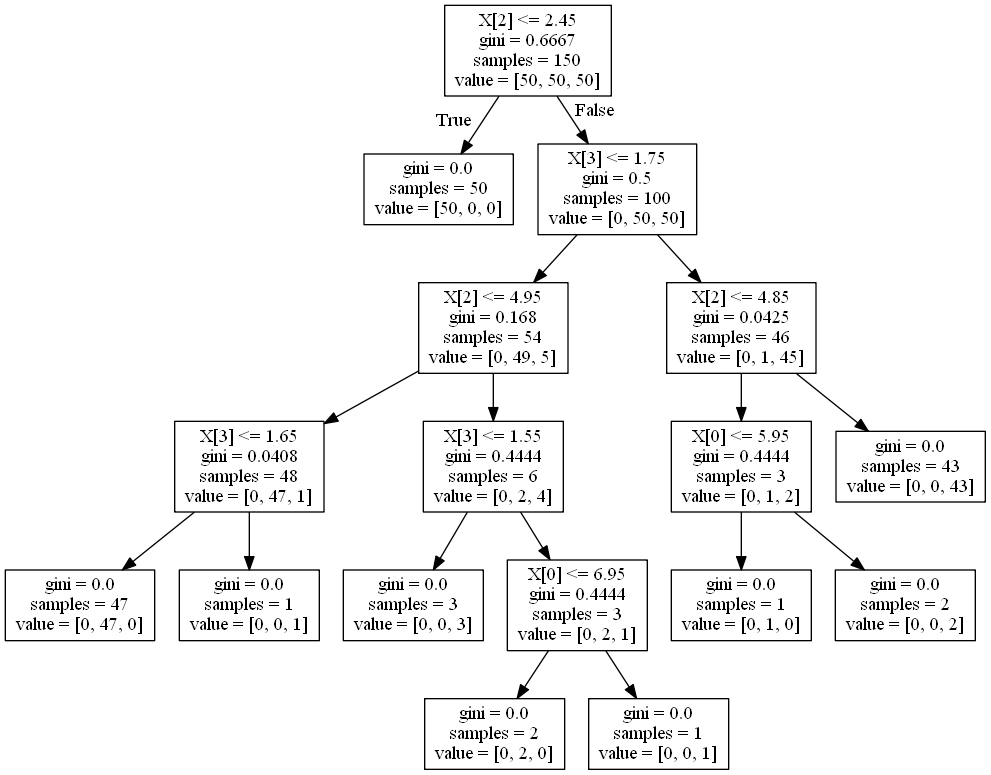

In [97]:
from PIL import Image
Image.open('tree.png')

In [100]:
from sklearn import tree
clf2 = tree.DecisionTreeClassifier(max_depth= 2)
clf2.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [101]:
from sklearn import tree
tree.export_graphviz(clf2, 'tree2.dot')

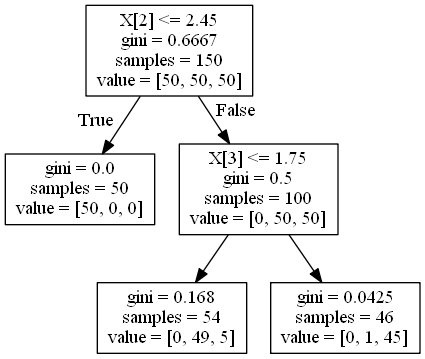

In [102]:
from PIL import Image
Image.open('tree2.png')

## 繪製決策邊界

In [105]:
from sklearn. datasets import load_iris
from sklearn import tree

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

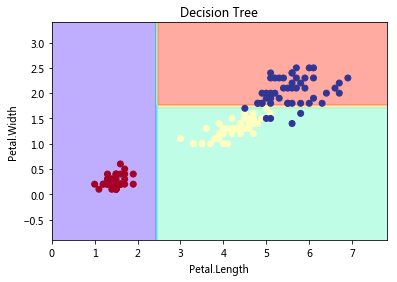

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# 繪製決策邊界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

plt.plot()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)

# 繪製資料點
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)

# 加上圖標
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()


## 邏輯式(Logit)迴歸

In [108]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
clf = LogisticRegression()
X = iris.data[:,[2,3]]
Y = iris.target
clf.fit(X, Y)

clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

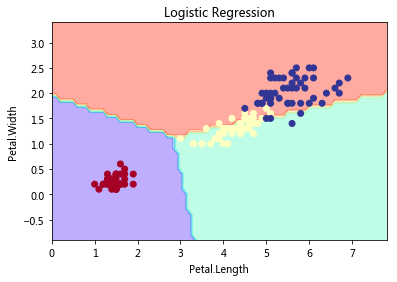

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# 繪製決策邊界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

plt.plot()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)

# 繪製資料點
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)

# 加上圖標
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()


## 建立 SVM

In [111]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
iris = load_iris()

X = iris.data[0:100,[2,3]]
y = iris.target[0:100]

clf1 = SVC(kernel="linear")
clf1.fit(X, y)

clf2 = LogisticRegression()
clf2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
def plot_estimator(estimator, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.plot()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()

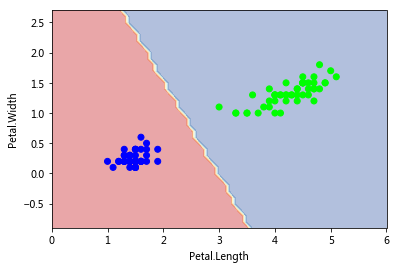

In [113]:
plot_estimator(clf1, X, y)

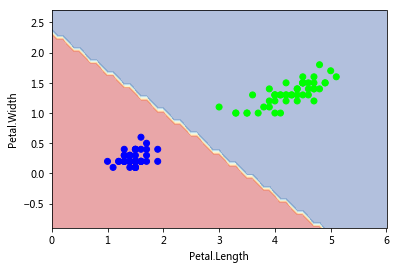

In [114]:
plot_estimator(clf2, X, y)

## 比較不同的Regluarization Term

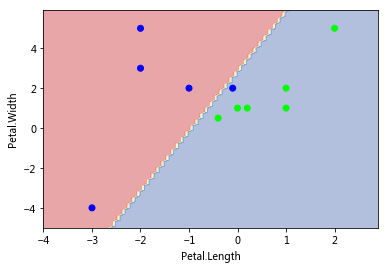

In [115]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1], [1,1,1], [-0.4,0.5,1],[2,5,1]])
X = data[:, :2] 
Y = data[:,2]

# Large Margin
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)


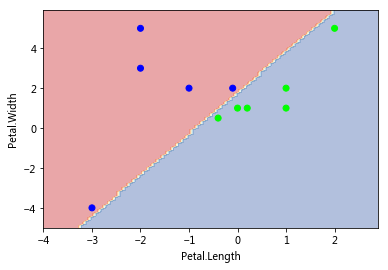

In [116]:
# Narrow Margin
clf = SVC(C=100000, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

## 比較不同Kernal Function

In [117]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [118]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

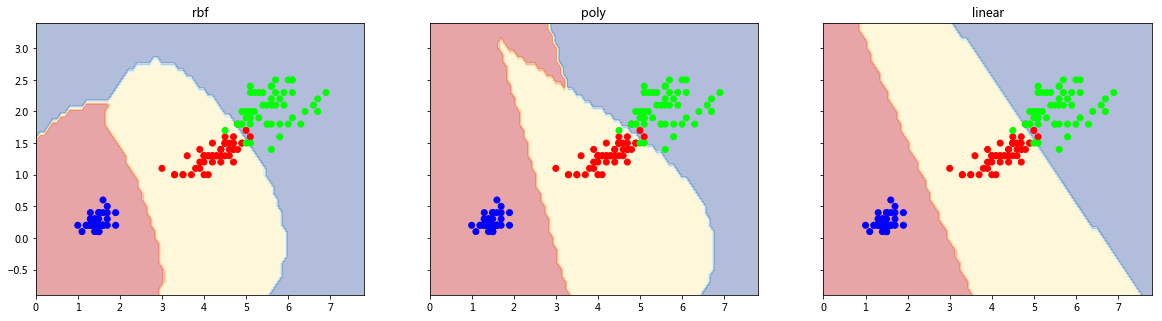

In [119]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    axarr[idx].set_title(title)


## 隨機森林 (Random Forest)

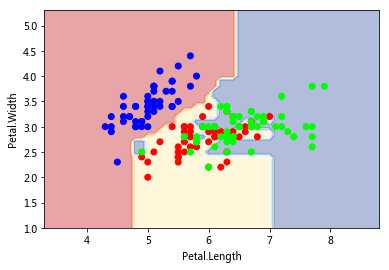

In [121]:
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
X = iris.data[:,[0,1]]
y = iris.target

clf = RandomForestClassifier(n_estimators=100, criterion="entropy")
clf.fit(X, y)
plot_estimator(clf, X, y)


In [122]:
clf1 = RandomForestClassifier(n_estimators=1, criterion="entropy")
clf1.fit(X, y)

clf10 = RandomForestClassifier(n_estimators=10, criterion="entropy")
clf10.fit(X, y)

clf100 = RandomForestClassifier(n_estimators=100, criterion="entropy")
clf100.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

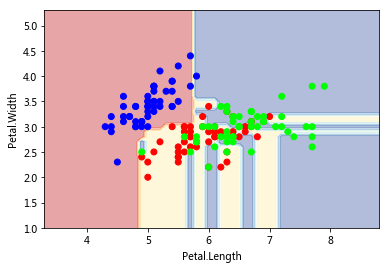

In [123]:
plot_estimator(clf1, X, y)

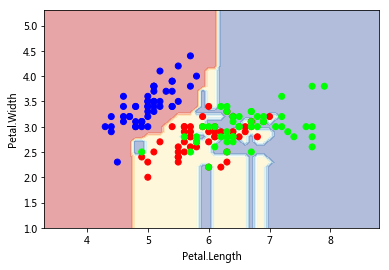

In [124]:
plot_estimator(clf10, X, y)

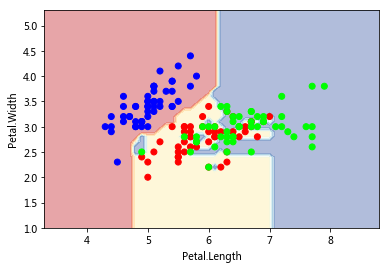

In [125]:
plot_estimator(clf100, X, y)

## 比較不同分類器

In [126]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = DecisionTreeClassifier()
clf2.fit(X, y)

clf3 = RandomForestClassifier(n_estimators=10, criterion="entropy")
clf3.fit(X, y)

clf4 = LogisticRegression()
clf4.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

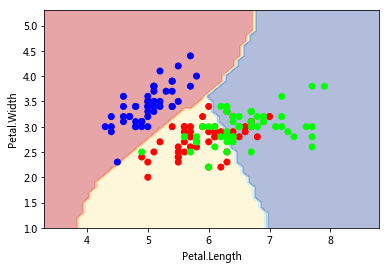

In [128]:
plot_estimator(clf1, X, y)

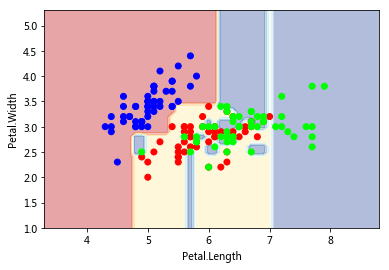

In [130]:
plot_estimator(clf2, X, y)

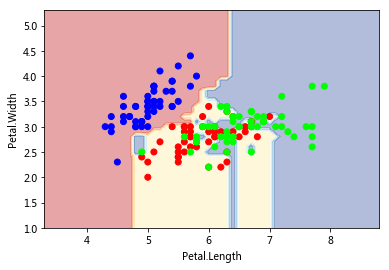

In [131]:
plot_estimator(clf3, X, y)

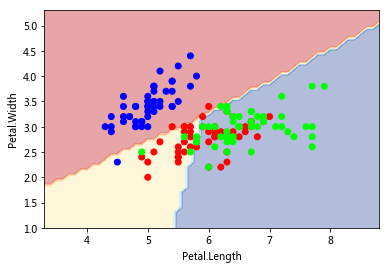

In [132]:
plot_estimator(clf4, X, y)

## 類神經網路

In [133]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


import numpy as np

digits = load_digits()


In [135]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

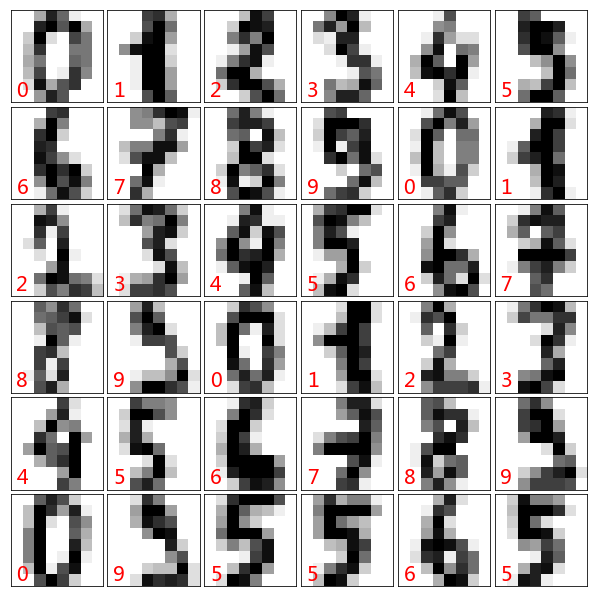

In [136]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]), color="red", fontsize = 20)


In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(digits.data)
X_scaled = scaler.transform(digits.data)


In [146]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='logistic', max_iter = 1000)
mlp.fit(X_scaled,digits.target)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

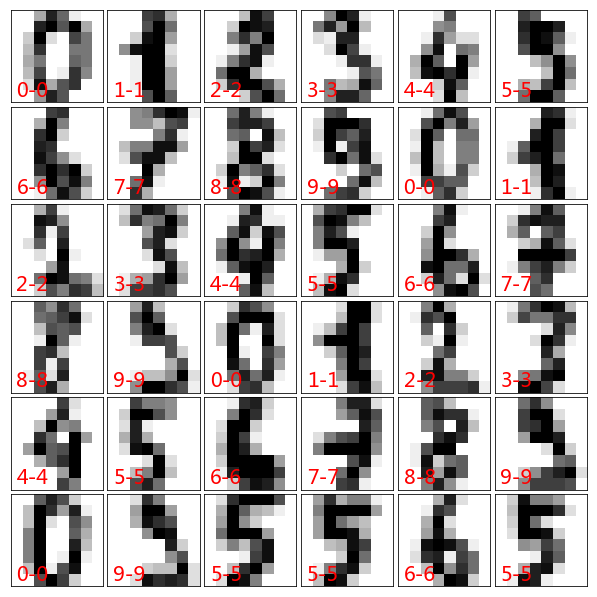

In [147]:
predicted = mlp.predict(X_scaled)
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str('{}-{}'.format(digits.target[i],predicted[i])), color="red", fontsize = 20)


In [148]:
sum(digits.target == predicted) / len(digits.target)

0.99888703394546463